# Recurrent neural network

- used with sequential data (time series, sentences...)

- parameters: input weights $\mathbf{W}_i$, input bias $\mathbf{b}_i$ hidden weights $\mathbf{W}_h$

- output of the RNN is the hidden state $\mathbf{h}_t$, which is usually multiplied by an output matrix (fully connected layer)

- $\phi$ denotes hyperbolic tangent function $\tanh$, $\odot$ denotes element-wise multiplication and $\cdot$ denotes dot product

![RNN](img/rnn.webp)

source: https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/

# Forward pass

$$\mathbf{z}_t = \mathbf{h}_{t-1} \cdot \mathbf{W}_h + \mathbf{x}_t \cdot \mathbf{W}_i + \mathbf{b}_i$$
$$\mathbf{h}_{t} = \phi(\mathbf{z}_t)$$

# Gradients

$$\frac{\partial \mathbf{z}_t}{\partial \mathbf{h}_{t-1}} = \mathbf{W}_h \quad \quad \frac{\partial \mathbf{z}_t}{\partial \mathbf{W}_h} = \mathbf{h}_{t-1} \quad \quad \frac{\partial \mathbf{z}_t}{\partial \mathbf{x}} = \mathbf{W}_i \quad \quad \frac{\partial \mathbf{z}_t}{\partial \mathbf{W}_i} = \mathbf{x} \quad \quad \frac{\partial \mathbf{z}_t}{\partial \mathbf{b}_i} = 1$$

$$\frac{\partial \mathbf{h}_t}{\partial \mathbf{z}_t} = \phi'(\mathbf{z}_t) = 1 - \mathbf{h}_t^2$$

# Backward pass


$$ 

\begin{align*}

\begin{aligned}

\frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_h} &= \left( \frac{\partial \mathcal{L}_t}{\partial \mathbf{h}_t} + \mathbf{g}_{t+1} \cdot \frac{\partial \mathbf{z}_{t+1}}{\partial \mathbf{h}_{t}} \right) \cdot \frac{\partial \mathbf{h}_t}{\partial \mathbf{z}_t} \cdot \frac{\partial \mathbf{z}_t}{\partial \mathbf{W}_h} \\

&= \left( \delta_t + \mathbf{g}_{t+1} \cdot \mathbf{W}_h \right) \cdot \phi'(\mathbf{z}_t)\cdot \mathbf{h}_{t-1} \\

&= \left[\mathbf{d}_t \odot \phi'(\mathbf{z}_t) \right] \cdot \mathbf{h}_{t-1} \\

&= \mathbf{g}_t \cdot \mathbf{h}_{t-1}

\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_h} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_h}
\end{aligned}

\end{align*}
$$

$$ 

\begin{align*}

\begin{aligned}

\frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_i} &= \left( \frac{\partial \mathcal{L}_t}{\partial \mathbf{h}_t} + \mathbf{g}_{t+1} \cdot \frac{\partial \mathbf{z}_{t+1}}{\partial \mathbf{h}_{t}} \right) \cdot \frac{\partial \mathbf{h}_t}{\partial \mathbf{z}_t} \cdot \frac{\partial \mathbf{z}_t}{\partial \mathbf{W}_i} \\

&= \left( \delta_t + \mathbf{g}_{t+1} \cdot \mathbf{W}_h \right) \cdot \phi'(\mathbf{z}_t)\cdot \mathbf{x}_{t} \\

&= \left[\mathbf{d}_t \odot \phi'(\mathbf{z}_t) \right] \cdot \mathbf{x}_{t} \\

&= \mathbf{g}_t \cdot \mathbf{x}_{t}

\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_i} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_i}
\end{aligned}

\end{align*}
$$

$$ 

\begin{align*}

\begin{aligned}

\frac{\partial \mathcal{L}_t}{\partial \mathbf{b}_i} &= \left( \frac{\partial \mathcal{L}_t}{\partial \mathbf{h}_t} + \mathbf{g}_{t+1} \cdot \frac{\partial \mathbf{z}_{t+1}}{\partial \mathbf{h}_{t}} \right) \cdot \frac{\partial \mathbf{h}_t}{\partial \mathbf{z}_t} \cdot \frac{\partial \mathbf{z}_t}{\partial \mathbf{b}_i} \\

&= \left( \delta_t + \mathbf{g}_{t+1} \cdot \mathbf{W}_h \right) \cdot \phi'(\mathbf{z}_t)\cdot 1 \\

&= \mathbf{d}_t \odot \phi'(\mathbf{z}_t) \\

&= \mathbf{g}_t

\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{b}_i} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{b}_i}
\end{aligned}

\end{align*}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RNN implementation

In [2]:
from dlfs.base import Layer

class RecurrentLayer(Layer):

    def __init__(self, n_inputs: int, n_hidden: int, predict_sequence: bool = False) -> None:
        """
        Recurrent layer. Takes 3D arrays of shape (n_samples, n_timestamps, n_features) as input.

        Parameters
        ----------
        n_inputs : int
            Number of input features.

        n_hidden : int
            Number of hidden features.

        predict_sequence : bool, default=False
            Whether a sequence or a single element is returned as output.

        Attributes
        ----------
        input_weights : numpy.ndarray
            Matrix of input weight coefficients.

        hidden_weights : numpy.ndarray
            Matrix of hidden weight coefficients.

        input_bias : numpy.ndaray
            Vector of input bias coefficients.
        """
        self.predict_sequence = predict_sequence

        # Initialize parameters
        k = 1 / np.sqrt(n_hidden)
        self.n_hidden = n_hidden
        self.input_weights = np.random.uniform(-k, k, (n_inputs, n_hidden))
        self.hidden_weights = np.random.uniform(-k, k, (n_hidden, n_hidden))
        self.input_bias = np.random.uniform(-k, k, (n_hidden))
      
    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using the recurrent layer. Creates hidden states and output attributes.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        # Store inputs for backpropagation
        self.inputs = inputs

        # Store number of samples
        self.n_samples, self.timestamps = inputs.shape[:2]

        # Initialize output
        if self.predict_sequence:
            self.output = np.zeros((self.n_samples, self.timestamps, self.n_hidden))
        else:
            self.output = np.zeros((self.n_samples, self.n_hidden))

        # Initialize hidden states
        self.hidden_states = np.zeros((self.n_samples, self.timestamps, self.n_hidden))

        # Loop through timestamps
        for t in range(self.timestamps):
            # Compute current hidden states
            hidden_states_t = np.tanh(np.dot(inputs[:, t, :], self.input_weights) + np.dot(self.hidden_states[:, max(0, t-1), :], self.hidden_weights) + self.input_bias)
            # Store current hidden states
            self.hidden_states[:, t, :] = hidden_states_t.copy()

        if self.predict_sequence:
            # Hidden states of the current sequence are the predicted sequence
            self.output = self.hidden_states.copy()
        else:
            # Last hidden state of the current sequence is the predicted element
            self.output = self.hidden_states[:, -1, :].copy()

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using the recurrent layer. 
        Creates gradient attributes with respect to input weights, hidden weights, input bias, and inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        # Initialize gradient attributes
        self.dinput_weights = np.zeros_like(self.input_weights)
        self.dhidden_weights = np.zeros_like(self.hidden_weights)
        self.dinput_bias = np.zeros_like(self.input_bias)
        self.dinputs = np.zeros_like(self.inputs, dtype=np.float64)

        # Initialize next hidden gradient
        next_hidden_gradient = None

        # Loop through timestamps in reversed order
        for t in range(self.timestamps - 1, -1, -1):

            if len(delta.shape) == 2:
                hidden_gradient = delta.copy()
            elif len(delta.shape) == 3:
                hidden_gradient = delta[:, t, :].copy()

            if next_hidden_gradient is not None:
                hidden_gradient += np.dot(next_hidden_gradient, self.hidden_weights)

            dtanh = 1 - self.hidden_states[:, t, :]**2
            hidden_gradient *= dtanh

            next_hidden_gradient = hidden_gradient.copy()

            if t > 0:
                self.dhidden_weights += np.dot(self.hidden_states[:, t-1, :].T, hidden_gradient)

            self.dinput_weights += np.dot(self.inputs[:, t, :].T, hidden_gradient)
            self.dinput_bias += hidden_gradient.sum(axis=0)

            self.dinputs[:, t, :] += np.dot(self.input_weights, hidden_gradient.T).T

class RNN:

    def __init__(self, n_inputs: int, n_hidden: int, n_layers: int = 1, predict_sequence: bool = False) -> None:
        """
        Recurrent neural network. Takes 3D arrays of shape (n_samples, n_timestamps, n_features) as input.

        Parameters
        ----------
        n_inputs : int
            Number of input features.

        n_hidden : int
            Number of hidden features.

        n_layers : int, default=1
            Number of recurrent layers.

        predict_sequence : bool, default=False
            Whether a sequence or a single element is returned as output.

        Attributes
        ----------
        recurrent_layers : list[RecurrentLayer]
            List containing recurrent layers.
        """
        if n_layers == 1:
            self.recurrent_layers = [RecurrentLayer(n_inputs, n_hidden, predict_sequence)]
        else:
            self.recurrent_layers = [RecurrentLayer(n_inputs, n_hidden)]
            if predict_sequence:
                for i in range(n_layers - 1):
                    if i == n_layers - 2:
                        self.recurrent_layers.append(RecurrentLayer(n_hidden, n_hidden, predict_sequence=True))
                    else:
                        self.recurrent_layers.append(RecurrentLayer(n_hidden, n_hidden))
            else:
                for i in range(n_layers - 1):
                    self.recurrent_layers.append(RecurrentLayer(n_hidden, n_hidden))

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using the RNN. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        # Pass data to the first recurrent layer
        self.recurrent_layers[0].forward(inputs)

        # Forward hidden states of the previous recurrent layer to the current one
        for idx, layer in enumerate(self.recurrent_layers[1:], start=1):
            layer.forward(self.recurrent_layers[idx - 1].hidden_states)

        # Output of the RNN is the final recurrent layer's output
        self.output = self.recurrent_layers[-1].output.copy()

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using the RNN.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        # Pass gradient to the final recurrent layer
        self.recurrent_layers[-1].backward(delta)

        # Backpropagate gradient
        for idx, layer in reversed(list(enumerate(self.recurrent_layers[:-1]))):
            layer.backward(self.recurrent_layers[idx + 1].dinputs)

In [3]:
def convert_data_to_sequence(X, y, sequence_length, predict_sequence=False):
    X_new = []
    y_new = []

    if predict_sequence:
        for i in range(len(X) - sequence_length):
            X_new.append(X[i:i+sequence_length, :])
            y_new.append(y[i:i+sequence_length])
    else:
        for i in range(len(X) - sequence_length):
            X_new.append(X[i:i+sequence_length, :])
            y_new.append(y[i+sequence_length])

    X_new, y_new = np.array(X_new), np.array(y_new)

    return X_new, y_new

# Sine dataset

In [4]:
def create_sine_data(start, stop, n_samples):
    X = np.linspace(start, stop, n_samples)
    y = np.sin(X)
    return X, y

X, y = create_sine_data(-20, 20, 500)

In [5]:
threshold = 0.8

X_train = X[:int(threshold*len(X))].copy().reshape(-1, 1)
y_train = y[:int(threshold*len(X))].copy().reshape(-1, 1)

X_test = X[int(threshold*len(X)):].copy().reshape(-1, 1)
y_test = y[int(threshold*len(X)):].copy().reshape(-1, 1)

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (400, 1), y_train: (400, 1)
X_test: (100, 1), y_test: (100, 1)


In [6]:
sequence_len = 5

X_train_seq, y_train_seq = convert_data_to_sequence(X_train, y_train, sequence_len)
X_test_seq, y_test_seq = convert_data_to_sequence(X_test, y_test, sequence_len)

print(f'X_train: {X_train_seq.shape}, y_train: {y_train_seq.shape}')
print(f'X_test: {X_test_seq.shape}, y_test: {y_test_seq.shape}')

X_train: (395, 5, 1), y_train: (395, 1)
X_test: (95, 5, 1), y_test: (95, 1)


In [7]:
from dlfs import Model
from dlfs.loss import MSE_Loss
from dlfs.optimizers import Optimizer_Adam
from dlfs.layers import RNN, DenseLayer

np.random.seed(0)

layers = [RNN(1, 256, n_layers=2),
          DenseLayer(256, 1)
          ]
lr = 1e-2

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_Adam(learning_rate=lr))
model.train(X_train_seq, y_train_seq, epochs=500, batch_size=None, print_every=50)

===== EPOCH : 0 ===== LOSS : 144.17539 =====
===== EPOCH : 50 ===== LOSS : 0.46466 =====
===== EPOCH : 100 ===== LOSS : 0.25105 =====
===== EPOCH : 150 ===== LOSS : 0.24963 =====
===== EPOCH : 200 ===== LOSS : 0.24948 =====
===== EPOCH : 250 ===== LOSS : 0.24945 =====
===== EPOCH : 300 ===== LOSS : 0.24945 =====
===== EPOCH : 350 ===== LOSS : 0.24945 =====
===== EPOCH : 400 ===== LOSS : 0.24945 =====
===== EPOCH : 450 ===== LOSS : 0.24945 =====
===== EPOCH : 500 ===== LOSS : 0.24945 =====


Sequence loss: 0.2496137554164797


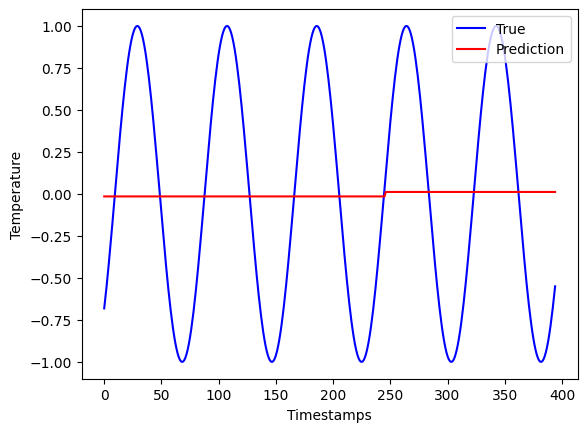

In [8]:
x = [x for x in range(len(X_train_seq))]

y_true = y_train_seq

x_pred = X_train_seq
y_pred = model.predict(x_pred)

print(f'Sequence loss: {model.loss_function.calculate(y_pred.reshape(-1), y_true)}')

plt.plot(x, y_true, color='blue', label="True")
plt.plot(x, y_pred, color="red", label="Prediction")
plt.xlabel('Timestamps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Weather dataset

In [4]:
import pandas as pd

data = pd.read_csv('clean_weather.csv', names=['date', 'tmax', 'tmin', 'rain', 'tmax_tomorrow'], header=0)
data.head(10)

,date,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.00,52.0
1,1970-01-02,52.0,39.0,0.00,52.0
2,1970-01-03,52.0,35.0,0.00,53.0
3,1970-01-04,53.0,36.0,0.00,52.0
4,1970-01-05,52.0,35.0,0.00,50.0
5,1970-01-06,50.0,38.0,0.00,52.0
6,1970-01-07,52.0,43.0,0.00,56.0
7,1970-01-08,56.0,49.0,0.24,54.0
8,1970-01-09,54.0,50.0,0.40,57.0
9,1970-01-10,57.0,50.0,0.00,57.0


In [5]:
FEATURES = ['tmax', 'tmin', 'rain']
TARGET = 'tmax_tomorrow'

X = data[FEATURES].to_numpy()
y = data[TARGET].to_numpy()

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (13509, 3)
y: (13509,)


# Train test split and scaling

In [6]:
from sklearn.preprocessing import StandardScaler

threshold = 0.3

X_train = X[:int(threshold*len(X)),:].copy()
y_train = y[:int(threshold*len(X))].copy()

X_test = X[int(threshold*len(X)):,:].copy()
y_test = y[int(threshold*len(X)):].copy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (4052, 3), y_train: (4052,)
X_test: (9457, 3), y_test: (9457,)


# One to one RNN

In [7]:
seq_len = 1

X_train_one, y_train_one = convert_data_to_sequence(X_train, y_train.reshape(-1, 1), seq_len)
X_test_one, y_test_one = convert_data_to_sequence(X_test, y_test.reshape(-1, 1), seq_len)

print(f'X_train_one: {X_train_one.shape}, y_train_one: {y_train_one.shape}')
print(f'X_test_one: {X_test_one.shape}, y_test_one: {y_test_one.shape}')

X_train_one: (4051, 1, 3), y_train_one: (4051, 1)
X_test_one: (9456, 1, 3), y_test_one: (9456, 1)


In [8]:
from dlfs import Model
from dlfs.loss import MSE_Loss
from dlfs.optimizers import Optimizer_SGD
from dlfs.layers import RNN, DenseLayer

np.random.seed(0)

layers = [RNN(3, 4),
          DenseLayer(4, 1)]
lr = 1e-4

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_SGD(learning_rate=lr))
model.train(X_train_one, y_train_one, epochs=50, batch_size=1, print_every=10)

===== EPOCH : 0 ===== LOSS : 73.60776004428513 =====
===== EPOCH : 10 ===== LOSS : 15.776029278875658 =====
===== EPOCH : 20 ===== LOSS : 15.569918778861593 =====
===== EPOCH : 30 ===== LOSS : 15.526936706949586 =====
===== EPOCH : 40 ===== LOSS : 15.5052388477171 =====
===== EPOCH : 50 ===== LOSS : 15.482486155398592 =====


In [12]:
from random import randint

idx = randint(0, len(X_test_one))
sample = X_test_one[idx].reshape(1, *X_test_one[0].shape)
y_pred = model.predict(sample)
print(y_pred)
print(y_test_one[idx])
print(f'Sample loss: {model.loss_function.calculate(y_pred.reshape(-1), y_test_one[idx])}')

[[71.28165643]]
[71.]
Sample loss: 0.03966517166337458


Sequence loss: 17.26914336631096


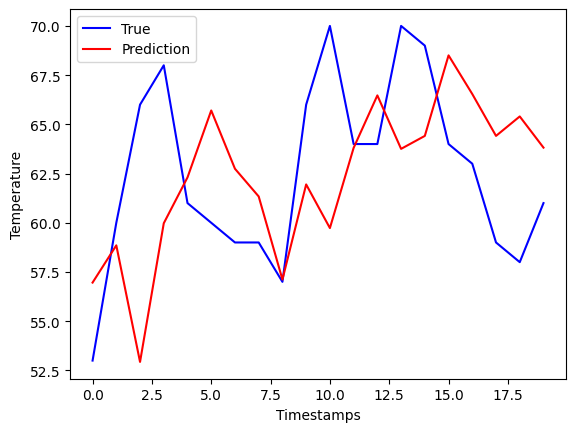

In [16]:
n_samples = 20
x = np.array([x for x in range(n_samples)])

rand_idx = randint(0, len(X_test_one) - n_samples)
y_true = y_test_one[rand_idx:rand_idx+n_samples]

x_pred = X_test_one[rand_idx:rand_idx+n_samples]
y_pred = model.predict(x_pred)
print(f'Sequence loss: {model.loss_function.calculate(y_pred.reshape(-1), y_true)}')

plt.plot(x, y_true, color='blue', label="True")
plt.plot(x, y_pred, color="red", label="Prediction")
plt.xlabel('Timestamps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Many to one RNN

In [17]:
seq_len = 10

X_train_seq, y_train_seq = convert_data_to_sequence(X_train, y_train.reshape(-1, 1), seq_len)
X_test_seq, y_test_seq = convert_data_to_sequence(X_test, y_test.reshape(-1, 1), seq_len)

print(f'X_train_seq: {X_train_seq.shape}, y_train_seq: {y_train_seq.shape}')
print(f'X_test_seq: {X_test_seq.shape}, y_test_seq: {y_test_seq.shape}')

X_train_seq: (4042, 10, 3), y_train_seq: (4042, 1)
X_test_seq: (9447, 10, 3), y_test_seq: (9447, 1)


In [18]:
np.random.seed(0)

layers = [RNN(3, 4), 
          DenseLayer(4, 1)]

lr = 1e-4

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_SGD(learning_rate=lr))
model.train(X_train_seq, y_train_seq, epochs=50, batch_size=1, print_every=10)

===== EPOCH : 0 ===== LOSS : 65.17251758526047 =====
===== EPOCH : 10 ===== LOSS : 19.798389801511455 =====
===== EPOCH : 20 ===== LOSS : 17.95554955909664 =====
===== EPOCH : 30 ===== LOSS : 17.825253664856238 =====
===== EPOCH : 40 ===== LOSS : 18.232471799209836 =====
===== EPOCH : 50 ===== LOSS : 17.869478840883886 =====


In [25]:
from random import randint

idx = randint(0, len(X_test_seq))
sample = X_test_seq[idx].reshape(1, *X_test_seq[0].shape)
y_pred = model.predict(sample)
print(y_pred)
print(y_test_seq[idx])
print(f'Sample loss: {model.loss_function.calculate(y_pred.reshape(-1), y_test_seq[idx])}')

[[69.60634881]]
[63.]
Sample loss: 21.821922330903732


Predicted: [70.32193949]
True: [71.]
Sample loss: 0.22988302487312262


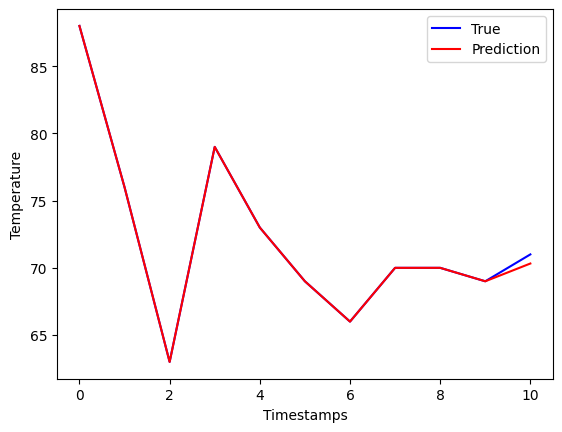

In [47]:
timestamps = 11
x = np.array([x for x in range(timestamps)])

rand_idx = randint(0, len(X_test_seq) - timestamps)
y_true_one = y_test_seq[rand_idx]

x_pred = X_test_seq[rand_idx].reshape(1, *X_test_seq[0].shape)
y_pred_one = model.predict(x_pred).reshape(-1)

print(f'Predicted: {y_pred_one}')
print(f'True: {y_true_one}')
print(f'Sample loss: {model.loss_function.calculate(y_pred_one, y_true_one)}')

y_true = y_test_seq[rand_idx-timestamps+1:rand_idx+1]
y_pred = list(y_true.copy())
y_pred.pop()
y_pred.append(y_pred_one)
y_pred = np.array(y_pred)

plt.plot(x, y_true, color='blue', label="True")
plt.plot(x, y_pred, color="red", label="Prediction")
plt.xlabel('Timestamps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Many to many RNN

In [71]:
seq_len = 7

X_train_seq, y_train_seq = convert_data_to_sequence(X_train, y_train.reshape(-1, 1), seq_len, predict_sequence=True)
X_test_seq, y_test_seq = convert_data_to_sequence(X_test, y_test.reshape(-1, 1), seq_len, predict_sequence=True)

print(f'X_train_seq: {X_train_seq.shape}, y_train_seq: {y_train_seq.shape}')
print(f'X_test_seq: {X_test_seq.shape}, y_test_seq: {y_test_seq.shape}')

X_train_seq: (4045, 7, 3), y_train_seq: (4045, 7, 1)
X_test_seq: (9450, 7, 3), y_test_seq: (9450, 7, 1)


In [72]:
np.random.seed(0)

layers = [RNN(3, 4, predict_sequence=True), 
          DenseLayer(4, 1)]

lr = 1e-4

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_SGD(learning_rate=lr))
model.train(X_train_seq, y_train_seq, epochs=50, batch_size=1, print_every=10)

===== EPOCH : 0 ===== LOSS : 14.87482297519936 =====
===== EPOCH : 10 ===== LOSS : 15.47088613912483 =====
===== EPOCH : 20 ===== LOSS : 15.585722954968116 =====
===== EPOCH : 30 ===== LOSS : 14.510388814136173 =====
===== EPOCH : 40 ===== LOSS : 14.01519063582044 =====
===== EPOCH : 50 ===== LOSS : 13.766821780633112 =====


In [76]:
idx = randint(0, len(X_test_seq))
sample = X_test_seq[idx].reshape(1, *X_test_seq[0].shape)
y_pred = model.predict(sample)
print(y_pred.reshape(-1))
print(y_test_seq[idx].reshape(-1))
print(f'Sequence loss: {model.loss_function.calculate(y_pred.reshape(-1), y_test_seq[idx].reshape(-1))}')

[59.90545047 66.10763198 68.24795411 69.28168746 69.30082225 71.92819117
 64.13037118]
[65. 69. 71. 73. 76. 64. 64.]
Sequence loss: 11.676573339770243


Sequence loss: 6.2321830009612


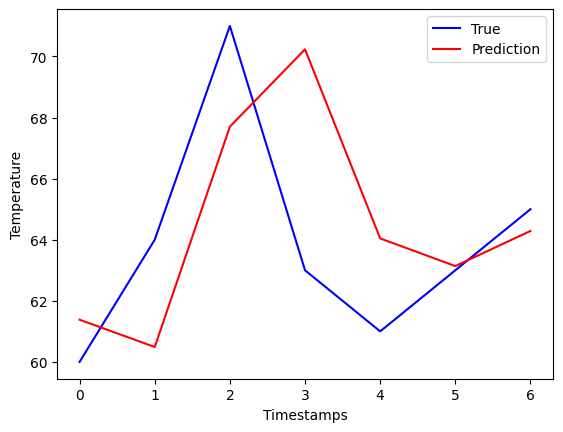

In [106]:
timestamps = 7
x = np.array([x for x in range(timestamps)])

rand_idx = randint(0, len(X_test_seq))
y_true = y_test_seq[rand_idx]

x_pred = X_test_seq[rand_idx].reshape(1, *X_test_seq[0].shape)
y_pred = model.predict(x_pred).flatten()
print(f'Sequence loss: {model.loss_function.calculate(y_pred.reshape(-1), y_true.reshape(-1))}')

plt.plot(x, y_true, color='blue', label="True")
plt.plot(x, y_pred, color="red", label="Prediction")
plt.xlabel('Timestamps')
plt.ylabel('Temperature')
plt.legend()
plt.show()